In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
class Sequence_Sampling():
    
    def __init__(self,n_sample,dimension):
        self.n_sample=n_sample
        self.dimension=dimension
    
    def is_prime(self,number):
        if number <2:
            return False
        else:
            for i in range(2,int(np.sqrt(number))+1):
                if number%i == 0:
                    return False
                
            return True
        
    
    def first_n_prime_number(self,dimension):
        primes=[]
        i=2
        while len(primes)<dimension:
            if self.is_prime(i)==True:
                primes.append(i)
            i+=1
        return primes

    def van_der_corput(self, n_sample, base=2):
    
        vdc_sequence = []
        for i in range(1,n_sample+1):
            n_th_number = 0.
            denominator=1.
            
            while i > 0:
                # Binary representation of i:
            # Firstly divide it with 2. Find the remainder and the result of the division and set it as new i
            # Then repeat the same process until i=1 and the division gives i=0. This gives the elements of 
            # binary representation for each iteration. For instance, i=7 gives 1110 for remainders and 7,3,1,0 for i values
                i, remainder = divmod(i, base)
                denominator *= base
                n_th_number += remainder / denominator # x_i = a_ij * base^-1
    
            vdc_sequence.append(n_th_number)
    
        return vdc_sequence

    def halton(self):
        
        bases=self.first_n_prime_number(self.dimension)
        halton_sequence=np.zeros((self.n_sample,self.dimension))
        for i in range(self.dimension):
            halton_sequence[:,i] = self.van_der_corput(n_sample=self.n_sample,base=bases[i])
        return halton_sequence
                
    def hammersly(self):
        
        bases=self.first_n_prime_number(self.dimension-1)
        hammersly_sequence=np.zeros((self.n_sample,self.dimension))
        
        hammersly_sequence[:,0]=np.arange(self.n_sample)/self.n_sample
        
        for i in range(1,self.dimension):
            hammersly_sequence[:,i] = self.van_der_corput(n_sample=self.n_sample,base=bases[i-1])
        return hammersly_sequence
    
    def faure(self):

        halton_seq = self.halton()
        bases=self.first_n_prime_number(self.dimension)
        # Apply a permutation to improve uniformity
        permutation_matrix = np.eye(len(bases))[:, ::-1]
        faure_seq = np.dot(halton_seq, permutation_matrix)

        return faure_seq

In [3]:
def lowbit0(n):
    m = 1
    j = 1
    while m&(~n)==0:
        m *= 2
        j += 1
    return j

def sobolSeq(poly,init,bits):

    # check input
    if len(poly)!=len(init):
        raise ValueError('Length of polynomial coeffs must match length of initializing values')

    for p in poly:
        if p!=0 and p!=1:
            raise ValueError('Polynomial coeffs must be zero or one.')

    for m in init:
        if m%2==0:
            raise ValueError('Initial values must be odd.')

    if bits<0:
        raise ValueError('Cannot have negative accuracy')

    # initialize direction numbers
    q = len(init)
    M = init
    V = [ M[i]*2**(bits-i-1) for i in range(q) ]
    A = poly

    for i in range(len(M),bits):
        m = M[-q]^((2**q)*M[-q])
        for j in range(1,q):
            m ^= (2**j)*M[-j]*A[j]
        M.append( m )
        V.append( m*2**(bits-i-1) )

    # generate
    n = 1
    S = 0
    while True:
        S = S ^ V[lowbit0(n)]
        n += 1
        yield float(S)/(2**bits)

In [4]:
def gauss2D(n):
    x, w = np.polynomial.legendre.leggauss(n)

    weights = []
    gauss_pts = []

    for i in range(n):
        for j in range(n):
            wts = w[i] * w[j]
            weights.append(wts)

            g = [x[i], x[j]]
            gauss_pts.append(g)

    return np.array(weights), np.array(gauss_pts)

In [30]:
N=1000
generator=Sequence_Sampling(N,2)  
halton=generator.halton()
hammersly=generator.hammersly()
faure=generator.faure()

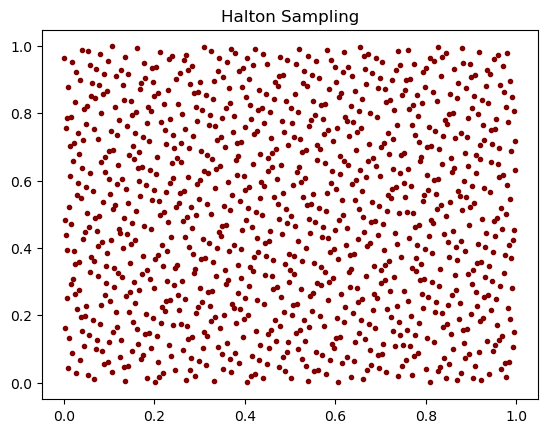

In [31]:
halton_seq=halton
plt.scatter(halton_seq[:,0],halton_seq[:,1],color='maroon',marker='.')
plt.title('Halton Sampling')
plt.show()

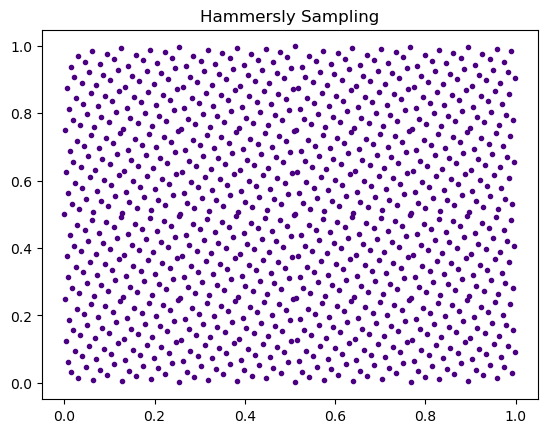

In [32]:
hammersly_seq=hammersly
plt.scatter(hammersly_seq[:,0],hammersly_seq[:,1],color='indigo',marker='.')
plt.title('Hammersly Sampling')
plt.show()

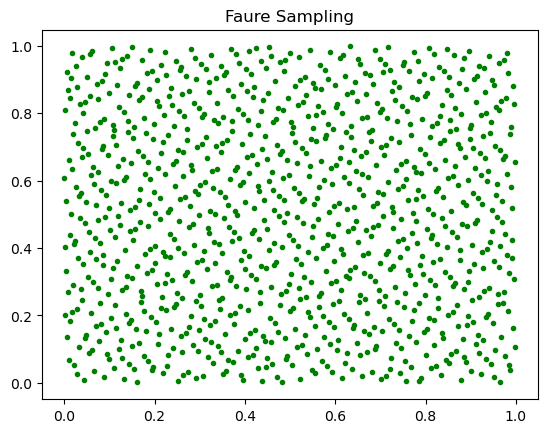

In [33]:
faure_seq=faure

plt.scatter(faure_seq[:,0],faure_seq[:,1],color='green',marker='.')
plt.title('Faure Sampling')
plt.show()

Text(0.5, 1.0, 'Sobol Sampling')

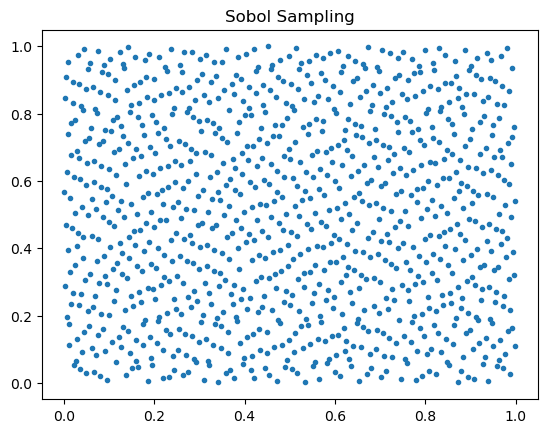

In [34]:
s1 = sobolSeq([1,1],[1,1],32)
s2 = sobolSeq([1,0,1],[1,3,7],32)


X =  [ next(s1) for _ in range(N) ]
Y =  [ next(s2) for _ in range(N) ]

plt.subplot(111)
plt.scatter(X,Y,marker='.')
plt.title('Sobol Sampling')
# plt.xlim(0,1)
# plt.ylim(0,1)
#plt.gca().set_aspect('equal')

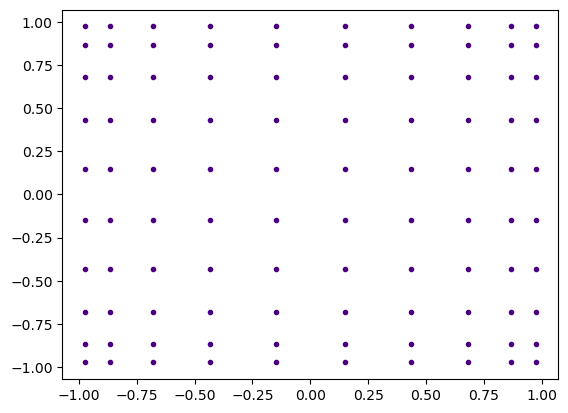

In [12]:
w,gauss=gauss2D(10)


plt.scatter(gauss[:,0],gauss[:,1],color='indigo',marker='.')
plt.show()

## Monte Carlo Integration

Integral of a function can be obtained with the monte carlo method. To find the result, sample points is neceserray which can be obtained by randomly or from a sequence sampling

<p style="font-size:18px">
\[ F = (b - a)\frac{1}{N}\sum_{i=1}^{N} f(x_{i}) \]
     \[x_{i} \in [a,b]\]
</p>

In [13]:
def f(x,y):
    return -(x**2)*(y**2)

In [14]:
F_analytic = -1./9.

In [24]:
N=100000
generator=Sequence_Sampling(N,2)  
halton=generator.halton()
hammersly=generator.hammersly()
faure=generator.faure()

faure_seq=faure
hammersly_seq=hammersly
halton_seq=halton

In [25]:
X_halton = halton_seq[:,0]
Y_halton = halton_seq [:,1]

X_hammersly = hammersly_seq[:,0]
Y_hammersly = hammersly_seq [:,1]

X_faure = faure_seq[:,0]
Y_faure = faure_seq [:,1]

X_sobol =  [ next(s1) for _ in range(N) ]
Y_sobol =  [ next(s2) for _ in range(N) ]

X_mc = np.random.uniform(size=(N,))
Y_mc = np.random.uniform(size=(N,))

integral_halton=0
integral_hammersly=0
integral_faure=0
integral_sobol=0
integral_mc=0


errHalton = []
errHammersly = []
errFaure = []
errSobol = []
errMC    = []

idxs = []
ni=0

In [26]:
for i in range(N):
    integral_halton += f(X_halton[i], Y_halton[i])
    integral_hammersly += f(X_hammersly[i], Y_hammersly[i])
    integral_faure += f(X_faure[i], Y_faure[i])
    integral_sobol += f(X_sobol[i], Y_sobol[i])
    integral_mc += f(X_mc[i], Y_mc[i])
    
    if i==ni: 
            errHalton.append(abs( integral_halton / (i+1) - F_analytic ))
            errHammersly.append(abs( integral_hammersly / (i+1) - F_analytic ))
            errFaure.append(abs( integral_faure / (i+1) - F_analytic ))
            errSobol.append(abs( integral_sobol / (i+1) - F_analytic ))
            errMC.append(abs( integral_mc / (i+1) - F_analytic ))
            ni += int(np.log10(i+1)+1)
            idxs.append( i )

integral_halton/=N
integral_hammersly/=N
integral_faure/=N
integral_sobol/=N
integral_mc/=N

In [27]:
print('Halton: ',integral_halton, 'Error: ', F_analytic-integral_halton)
print('Hammersly: ',integral_hammersly,'Error: ', F_analytic-integral_hammersly)
print('Faure: ',integral_faure,'Error: ', F_analytic-integral_faure)
print('Sobol: ',integral_sobol,'Error: ', F_analytic-integral_sobol)
print('Random: ',integral_mc,'Error: ', F_analytic-integral_mc)

Halton:  -0.11109120568176319 Error:  -1.9905429347918946e-05
Hammersly:  -0.1111093799606847 Error:  -1.7311504263983757e-06
Faure:  -0.11109120568176319 Error:  -1.9905429347918946e-05
Sobol:  -0.11110686306140846 Error:  -4.248049702643142e-06
Random:  -0.11168823558039626 Error:  0.0005771244692851507


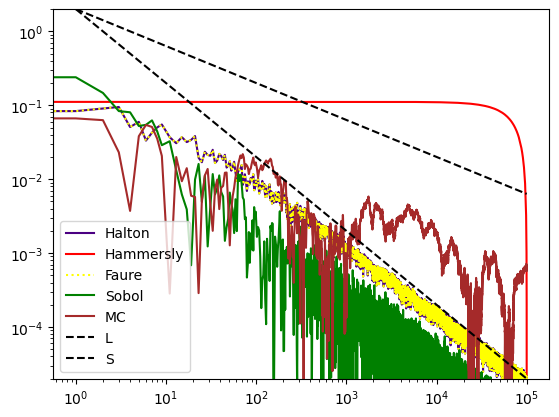

In [28]:
n = np.array(range(N),dtype=np.float_)+1
L = 2*(n)**-1
S = 2*(n)**-0.5

plt.loglog(idxs, errHalton, color='indigo', label='Halton')
plt.loglog(idxs, errHammersly, color='red', label='Hammersly')
plt.loglog(idxs, errFaure, color='yellow', linestyle='dotted', label='Faure')
plt.loglog(idxs, errSobol, color='green', label='Sobol')
plt.loglog(idxs, errMC, color='brown', label='MC')
plt.loglog(n, L, 'k--', label='L')
plt.loglog(n, S, 'k--', label='S')

# Set the y-axis limit based on your data
plt.ylim(min(L), max(L))

# Add legend
plt.legend()

# Show the plot
plt.show()

In [36]:
error=[]
analytic=-4/9
for i in range(2,50):
    w,gauss=gauss2D(i)  
    legendre=np.sum(f(gauss[:,0],gauss[:,1])*w)
    error.append(legendre-analytic)



Text(0.5, 1.0, 'Error rate in Gauss Quadrature with respect to different number of points')

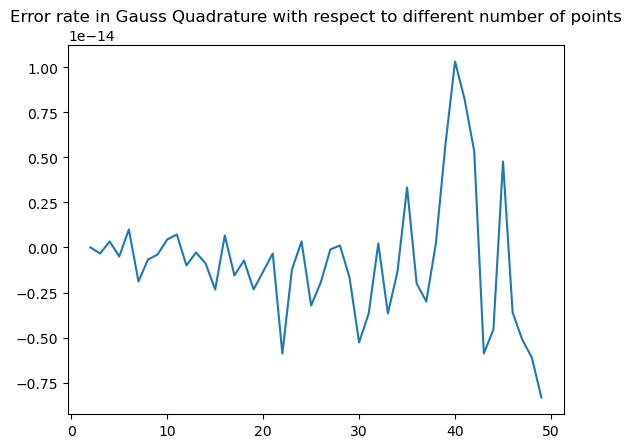

In [38]:
plt.plot(np.arange(2,50),error)
plt.title('Error rate in Gauss Quadrature with respect to different number of points')